# Laboratorio 2 - Práctica 2: MLP con Keras para funciones lógicas

---
<img src="ufv.png" width="100px" height="100px"></img> 
### Integrantes: 
* Julián Prieto Velasco   
* Guillermo Ramírez Cárdenas
* Pedro Paniagua Falo     
* Javier Muñoz Rojas

---

## **Índice**
1. [Introducción](#id0)
1. [MLP](#id1)


---

### Importar Librerias

In [7]:
#Importacion de Librerias
import numpy as np
import pandas as pd
import sklearn
import tensorflow as ts
import matplotlib.pyplot as plt
import keras
from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ProgbarLogger
from sklearn.model_selection import train_test_split
import pprint
import os
import imageio
import numpy as np


<div id='id0'/>

## *Introducción*
---
Usando  la  API  de  Keras,  crea  un  modelo  neuronal  ’fully  connected’  y secuencial.  El  modelo  tendrá  que  resolver  la  función  XOR.  Prueba  con  distinto  número  de  neuronas  en  la  capa oculta (estima el rango de variación según lo visto en teoría) y varios valores de epoch.

Haz al menos 3 modelos intentando optimizar los resultados. Usar como optimizer ‘Adam’, funciones de activación ‘ReLU’ y ‘sigmoide’, y función de error ‘Mean Squared Error’.

---


<div id='id2'/>

### *MLP: Implementación de la red*

---


Neuronas en capa oculta: 2 Epocas: 1000
-------------------------------------------------
Epoch 0: loss=0.24187235534191132, accuracy=0.75
Epoch 250: loss=0.21673275530338287, accuracy=0.75
Epoch 500: loss=0.18930377066135406, accuracy=0.75
Epoch 750: loss=0.17610247433185577, accuracy=0.75
1/1 [==============================] - 0s 54ms/step
Entrada: [0 0] Etiqueta real: 0 Predicción: 0.3549808
Entrada: [0 1] Etiqueta real: 1 Predicción: 0.3549808
Entrada: [1 0] Etiqueta real: 1 Predicción: 0.87108254
Entrada: [1 1] Etiqueta real: 0 Predicción: 0.3549808
1/1 [==============================] - 0s 130ms/step - loss: 0.1712 - accuracy: 0.7500

Neuronas en capa oculta: 2 Epocas: 5000
-------------------------------------------------
Epoch 0: loss=0.2563233971595764, accuracy=0.75
Epoch 250: loss=0.23664477467536926, accuracy=0.75
Epoch 500: loss=0.20956113934516907, accuracy=1.0
Epoch 750: loss=0.1600995659828186, accuracy=1.0
Epoch 1000: loss=0.11002098768949509, accuracy=1.0
Epoch 1250:

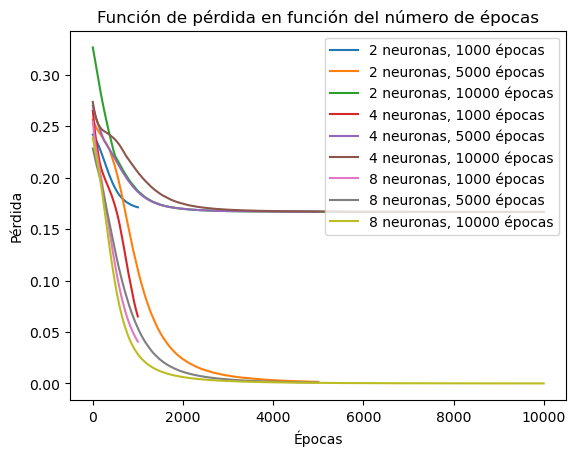

In [8]:
# Datos de entrenamiento
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])


# Lista de neuronas en la capa oculta
neurons = [2, 4, 8]

# Lista de valores de época
epochs = [1000, 5000, 10000]

def print_progress(epoch, logs):
    if epoch % 250 == 0:
        print('Epoch {}: loss={}, accuracy={}'.format(epoch, logs['loss'], logs['accuracy']))


# Bucle para entrenar diferentes modelos
for n in neurons:
  for e in epochs:
      # Crear modelo
        model = Sequential()
        model.add(Dense(n, input_dim=2, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

        # Entrenar modelo 
        print("\nNeuronas en capa oculta:", n, "Epocas:", e)
        print("-------------------------------------------------")
        history = model.fit(X, y, epochs=e, verbose=0, callbacks=[LambdaCallback(on_epoch_end=print_progress)])

        # Predecir valores
        y_pred = model.predict(X)

        for i in range(len(y_pred)):
            print("Entrada:", X[i], "Etiqueta real:", y[i], "Predicción:", y_pred[i][0])
        
        scores = model.evaluate(X, y)
                
        # Graficar función de pérdida
        plt.plot(history.history['loss'], label=f'{n} neuronas, {e} épocas')
        
        
# Configurar gráfico
plt.title('Función de pérdida en función del número de épocas')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()   
        